In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import networkx as nx
import osmnx as ox
import numpy as np

from shapely.geometry import Point

import overpy
api = overpy.Overpass()

from toolz import unique

utw = ox.settings.useful_tags_way + ['railway']
#ox.config(use_cache=True, log_console=True, useful_tags_way=utw)
ox.settings.useful_tags_way = utw

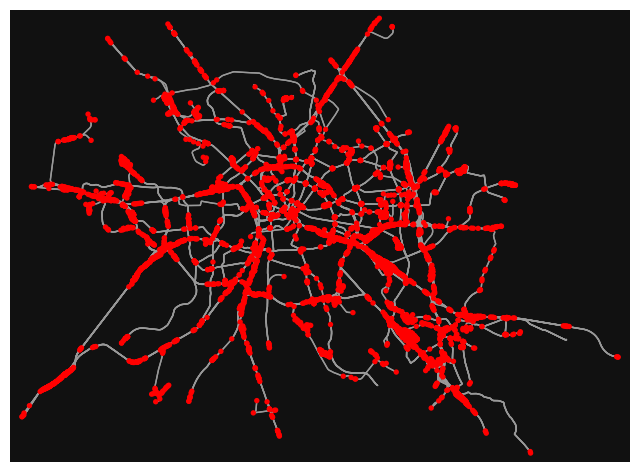

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [2]:
G = ox.graph_from_place("Berlin, Germany", simplify=True,  custom_filter='["railway"]')
ox.plot_graph(G, node_color="r")

In [3]:
gdf_n, gdf_e = ox.graph_to_gdfs(G)

p_hbf = Point(7.63579, 51.95641)

In [4]:
res = api.query("""
( area[name="Berlin"];) -> .searchArea;
(
node["railway"="stop"][train](area.searchArea);
);
out body;
""")
stations = list(unique(res.nodes, key=lambda n: n.tags['name']))

In [5]:
def get_nodes_near(loc):
    p = Point(float(loc.lon), float(loc.lat))
    return gdf_n[gdf_n.geom_almost_equals(p, decimal=2)].to_crs(3857)

In [6]:
nodes_near_stations = list(filter(lambda n: n.size > 0, [
    get_nodes_near(station) for station in stations
]))

In [7]:
def quotient(u,v):
    return any(
        [u in nodes.index for nodes in nodes_near_stations]
    ) and any(
        [v in nodes.index for nodes in nodes_near_stations]
    )

In [ ]:
Gq = nx.quotient_graph(G, quotient)

In [ ]:
G.number_of_nodes(), Gq.number_of_nodes()

In [ ]:
G.number_of_edges(), Gq.number_of_edges()